In [2]:
import pandas as pd
import numpy as np
import pprint
import matplotlib.pyplot as plt
from collections import Counter
import os
import re
import statsmodels.formula.api as sm
from datetime import datetime
from dateutil.parser import parse


In [3]:
# #Datasets:
# 1). GA Data. Variables:
# ga:pageTitle (Title)
# ga:eventAction (variable that needs to go into columns: 25%, 50%, 75%)
# Ga:dimension27 (Tag)
# ga:totalEvents (number that should go into ga:eventAction)

In [4]:
os.chdir( '/Users/saramarcos/Desktop/VideoAnalysis/' )

In [7]:
dataset_0=pd.read_csv("ga_data.csv", encoding='latin-1')

In [1]:
#dataset_0

In [9]:
dataset_1 = dataset_0.pivot_table( index = ['video_id'], columns = 'action', values = 'event_count' )    #..... pivoting ga_df

In [10]:
dataset_1.columns.name = None

In [11]:
ga_df_final = dataset_1.reset_index()

In [12]:
list(ga_df_final)

['video_id', 'video_25_percent', 'video_50_percent', 'video_75_percent']

In [13]:
#ga_df_final

In [16]:
datset_looker_0=pd.read_csv('looker_data.csv',encoding='latin-1')

In [20]:
#datset_looker_0

In [21]:
list(datset_looker_0)

['video_id',
 'MCP Videos Title',
 'MCP Videos File Duration',
 'MCP Videos Released Time',
 'MCP Videos Metrics - Daily By Position and Play Type Video Content Start',
 'MCP Videos Metrics - Daily By Position and Play Type Video Content 100%',
 'MCP Videos Metrics - Daily By Position and Play Type Video Load']

In [22]:
datset_looker_0.rename(columns={'MCP Videos Video ID':'video_id'},inplace=True)

In [23]:
#2.1. Change variable name “MCP Videos Title” into “Title”
datset_looker_0.rename(columns={'MCP Videos Title':'Title'},inplace=True)


In [24]:
#2.2. Change variable “MCP Videos File Duration” into “Minutes”
datset_looker_0.rename(columns={'MCP Videos File Duration':'Minutes'},inplace=True)


In [25]:
# 2.3. Change variable “MCP Videos Released Time” into “Date_Time”
datset_looker_0.rename(columns={'MCP Videos Released Time':'Date_Time'},inplace=True)
#... Converting to date time ...
datset_looker_0['Date_Time'] = pd.to_datetime(datset_looker_0['Date_Time'])


In [26]:
#.... 2.3.1
datset_looker_0['day'] = [ datset_looker_0.Date_Time[i].day for i in range( len( datset_looker_0 ) ) ]
datset_looker_0['weekday'] = [ datset_looker_0.Date_Time[i].weekday() for i in range( len( datset_looker_0 ) ) ]
datset_looker_0['month'] = [ datset_looker_0.Date_Time[i].month for i in range( len( datset_looker_0 ) ) ]
datset_looker_0['hour'] = [ datset_looker_0.Date_Time[i].hour for i in range( len( datset_looker_0 ) ) ]


In [27]:
datset_looker_0

,video_id,Title,Minutes,Date_Time,MCP Videos Metrics - Daily By Position and Play Type Video Content Start,MCP Videos Metrics - Daily By Position and Play Type Video Content 100%,MCP Videos Metrics - Daily By Position and Play Type Video Load,day,weekday,month,hour
0,3494563,"""AmÃ©rica no ha mejorado sus resultados con JÃ...",221,2018-03-19 23:54:00,579,336,64,19,0,3,23
1,3494560,Acusan a empresa de Jared Kushner por falsific...,174,2018-03-19 23:54:00,569,366,"2,356",19,0,3,23
2,3494559,"En Los Alamitos, California, discuten medida q...",123,2018-03-19 23:52:00,381,183,524,19,0,3,23
3,3494557,Corte Suprema ordena a Arizona seguir otorgand...,123,2018-03-19 23:49:00,286,173,241,19,0,3,23
4,3494553,Revelan inÃ©dito video de la masacre en el clu...,30,2018-03-19 23:43:00,131,26,198,19,0,3,23
5,3494545,Annette Taddeo dice que los electos deben lleg...,166,2018-03-19 23:35:00,28,3,55,19,0,3,23
6,3494544,Arrestan al hermano de Nikolas Cruz por entrar...,118,2018-03-19 23:34:00,"2,605","1,814","14,825",19,0,3,23
7,3494543,Â¿La indisciplina se apoderÃ³ del AmÃ©rica? El...,110,2018-03-19 23:24:00,"1,344","1,030",113,19,0,3,23
8,3494540,Se despide el primer lÃ­der latino en el Senad...,173,2018-03-19 23:23:00,116,45,131,19,0,3,23
9,3494539,Hombre muere a manos de oficiales al sur de Sa...,137,2018-03-19 23:18:00,43,14,40,19,0,3,23


In [28]:
# 2.4. Change vble “MCP Videos Metrics - Daily By Position and Play Type Video Content
# Start” into “Content_Start”

datset_looker_0.rename(columns={'MCP Videos Metrics - Daily By Position and Play Type Video Content Start':'Content_Start'},inplace=True)


In [29]:
# 2.5. Change vble name “MCP Videos Metrics - Daily By Position and Play Type Video
# Content 100%” into “100%”
datset_looker_0.rename(columns={'MCP Videos Metrics - Daily By Position and Play Type Video Content 100%':'100%'},inplace=True)


In [30]:
# 2.6. Change vble name “MCP Videos Metrics - Daily By Position and Play Type Video
# Load” into “Video_load”

datset_looker_0.rename(columns={'MCP Videos Metrics - Daily By Position and Play Type Video Load':'Video_load'},inplace=True)


In [31]:
# 3. Join both GA and Looker datasets matching by title.
merged_df = pd.merge( datset_looker_0, ga_df_final, on = 'video_id', how = 'inner' )     #...... Inner joining the two dataframe


In [32]:
# 4. Clean duplicates.
merged_df.drop_duplicates()


,video_id,Title,Minutes,Date_Time,Content_Start,100%,Video_load,day,weekday,month,hour,video_25_percent,video_50_percent,video_75_percent
0,3494563,"""AmÃ©rica no ha mejorado sus resultados con JÃ...",221,2018-03-19 23:54:00,579,336,64,19,0,3,23,11.000000,9.500000,8.500000
1,3494560,Acusan a empresa de Jared Kushner por falsific...,174,2018-03-19 23:54:00,569,366,"2,356",19,0,3,23,112.000000,109.500000,105.000000
2,3494559,"En Los Alamitos, California, discuten medida q...",123,2018-03-19 23:52:00,381,183,524,19,0,3,23,100.000000,97.500000,90.500000
3,3494557,Corte Suprema ordena a Arizona seguir otorgand...,123,2018-03-19 23:49:00,286,173,241,19,0,3,23,41.000000,37.000000,34.000000
4,3494553,Revelan inÃ©dito video de la masacre en el clu...,30,2018-03-19 23:43:00,131,26,198,19,0,3,23,109.000000,106.000000,103.000000
5,3494545,Annette Taddeo dice que los electos deben lleg...,166,2018-03-19 23:35:00,28,3,55,19,0,3,23,14.500000,14.000000,13.500000
6,3494544,Arrestan al hermano de Nikolas Cruz por entrar...,118,2018-03-19 23:34:00,"2,605","1,814","14,825",19,0,3,23,1152.000000,1078.000000,1033.500000
7,3494543,Â¿La indisciplina se apoderÃ³ del AmÃ©rica? El...,110,2018-03-19 23:24:00,"1,344","1,030",113,19,0,3,23,23.500000,22.000000,20.500000
8,3494540,Se despide el primer lÃ­der latino en el Senad...,173,2018-03-19 23:23:00,116,45,131,19,0,3,23,23.000000,21.000000,19.000000
9,3494539,Hombre muere a manos de oficiales al sur de Sa...,137,2018-03-19 23:18:00,43,14,40,19,0,3,23,7.666667,6.666667,6.333333


In [33]:

merged_df.to_csv('example.csv')

In [34]:
# Variables aggregation (in columns):
# 5. Minutes video watched​ (calculating by the length of the file and the percentage
# watched - 25, 50, 75)
# 6. Completion ratio​ (calculating with completion 100% and start video variables)
# 7. Video content start ratio​ (calculating with video start and total number of videos)
# 8. Video content load ratio​ (calculating with video load and total number of videos)
# 9. Get 25% view ratio​ (calculating 25% and total videos), same for 50 and 75%.

merged_df['Completion ratio​']=merged_df['100%']/merged_df['Content_Start']
merged_df['Video_content_start_ratio']=merged_df['Content_Start']/len(merged_df)
merged_df['25% View Ratio']=merged_df['video_25_percent']/len(merged_df)
merged_df['50% View Ratio']=merged_df['video_50_percent']/len(merged_df)
merged_df['75% View Ratio']=merged_df['video_75_percent']/len(merged_df)



TypeError: unsupported operand type(s) for /: 'str' and 'str'

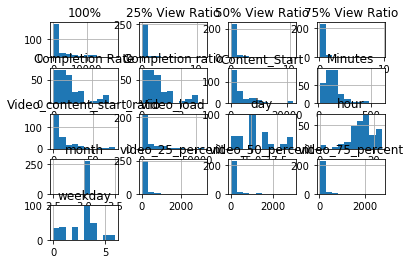

In [37]:
# 10. Do some plot analysis
merged_df.hist()
plt.show()


In [39]:
# 11. summary values

month_summary = merged_df.groupby('month')['Content_Start', 'Video_load', 'Completion Rate'].describe()

weekday_summary = merged_df.groupby('weekday')['Content_Start', 'Video_load', 'Completion Rate'].describe()

hour_summary = merged_df.groupby('hour')['Content_Start', 'Video_load', 'Completion Rate'].describe()

tag_summary = merged_df.groupby('Tag')['Content_Start', 'Video_load', 'Completion Rate'].describe()


In [41]:
hour_summary

Content_Start                                                     \
             count         mean          std     min      25%     50%   
hour                                                                    
0.0            1.0   807.000000          NaN   807.0   807.00   807.0   
1.0            4.0   693.250000   365.338542   406.0   528.25   569.0   
2.0            3.0  1563.000000  1501.458291   355.0   722.50  1090.0   
6.0            4.0  1007.000000     0.000000  1007.0  1007.00  1007.0   
7.0            3.0   138.000000   104.560987    51.0    80.00   109.0   
8.0            1.0   142.000000          NaN   142.0   142.00   142.0   
9.0            6.0   448.333333   376.157768    61.0   204.50   318.0   
10.0          11.0  4691.818182  3314.220567   135.0   862.00  7071.0   
11.0           2.0   714.500000     0.707107   714.0   714.25   714.5   
12.0          31.0  7373.225806  8097.894746    67.0   800.00  5183.0   
13.0          16.0  3681.562500  4253.073351   123.0   443.50   889.0   
14.0          22.0  1736.272727  2127.220144    15.0   216.25   978.0   
15.0          24.0  4373.083333  4488.683771    13.0   564.00  1541.0   
16.0          12.0  1362.083333  1288.846239     0.0   500.25   889.0   
17.0          29.0  2207.034483  2262.819046   111.0  1327.00  1400.0   
18.0          41.0  3214.146341  3605.119177    66.0   897.00  2793.0   
19.0          26.0  5689.692308  5199.890520   265.0  1314.50  4784.0   
20.0           3.0  7897.333333  3310.447754  5805.0  5989.00  6173.0   
21.0           9.0   158.333333   216.274710    32.0    46.00   109.0   
22.0           6.0  3797.333333  3741.633422   605.0  1527.00  2904.0   
23.0          27.0  2409.259259  2608.286508    29.0   278.00  2165.0   

                        Video_load                  ...                        \
           75%      max      count          mean    ...          75%      max   
hour                                                ...                         
0.0     807.00    807.0        1.0   1328.000000    ...      1328.00   1328.0   
1.0     734.00   1229.0        4.0    206.250000    ...       279.00    279.0   
2.0    2167.00   3244.0        3.0    162.333333    ...       209.00    253.0   
6.0    1007.00   1007.0        4.0    421.000000    ...       421.00    421.0   
7.0     181.50    254.0        3.0    258.333333    ...       316.50    364.0   
8.0     142.00    142.0        1.0    313.000000    ...       313.00    313.0   
9.0     692.50   1009.0        6.0    612.833333    ...       760.00   1797.0   
10.0   7071.00   7071.0       11.0  12960.727273    ...     19863.00  19863.0   
11.0    714.75    715.0        2.0   1812.500000    ...      2406.75   3001.0   
12.0  12378.00  22101.0       31.0  11884.741935    ...     22544.00  56975.0   
13.0   8254.00  11955.0       16.0   8443.312500    ...     22155.00  22155.0   
14.0   2935.00   8945.0       22.0   3748.000000    ...      6385.00  19491.0   
15.0   8584.00  15604.0       24.0   5801.333333    ...     10666.00  26736.0   
16.0   2479.50   3409.0       12.0   1726.500000    ...      3373.50   4869.0   
17.0   2191.00  11191.0       29.0   3477.034483    ...      3869.00  16533.0   
18.0   4016.00  22091.0       41.0   3044.951220    ...      4017.00  19966.0   
19.0   9122.00  17969.0       26.0   8586.884615    ...     13011.00  32649.0   
20.0   8943.50  11714.0        3.0  14698.333333    ...     18678.50  22672.0   
21.0    109.00    716.0        9.0    114.000000    ...       150.00    202.0   
22.0   4031.25  10896.0        6.0   1462.166667    ...      2603.50   2809.0   
23.0   3188.00   9266.0       27.0   3760.185185    ...      5005.00  14081.0   

     Completion Rate                                                    \
               count      mean       std       min       25%       50%   
hour                                                                     
0.0              1.0  0.187113       NaN  0.187113  0.187113  0.187113   
1.0        

In [42]:
# 12. Top 5 most watched videos

month_top_5 = merged_df.sort_values(['month','Minutes'],ascending=False).groupby('month').head(5)

weekday_top_5 = merged_df.sort_values(['weekday','Minutes'],ascending=False).groupby('weekday').head(5)

hour_top_5 = merged_df.sort_values(['hour','Minutes'],ascending=False).groupby('hour').head(5)

Tag_top_5 = merged_df.sort_values(['Tag','Minutes'],ascending=False).groupby('Tag').head(5)


In [43]:
# 13 Correlation Matrix

Correlation_Matrix = merged_df[['video_25_percent','video_50_percent','video_75_percent','Minutes','Content_Start','100%','Completion Rate']]
print(Correlation_Matrix.corr())



                  video_25_percent  video_50_percent  video_75_percent  \
video_25_percent          1.000000          0.998242          0.995019   
video_50_percent          0.998242          1.000000          0.998119   
video_75_percent          0.995019          0.998119          1.000000   
Minutes                  -0.015462         -0.005938         -0.024677   
Content_Start             0.453594          0.445747          0.443303   
100%                      0.222556          0.209373          0.208743   
Completion Rate          -0.076234         -0.084379         -0.083068   

                   Minutes  Content_Start      100%  Completion Rate  
video_25_percent -0.015462       0.453594  0.222556        -0.076234  
video_50_percent -0.005938       0.445747  0.209373        -0.084379  
video_75_percent -0.024677       0.443303  0.208743        -0.083068  
Minutes           1.000000       0.094264 -0.017076        -0.064963  
Content_Start     0.094264       1.000000  0.650660 